### IMPORTING LIBRARIES

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

### LOADING THE DATASET AND DESCRIBING STATISTICS

In [2]:
data = pd.read_csv("Dataset_Study3.csv")

print(data.describe())

        HRV_MeanNN    HRV_SDNN   HRV_RMSSD  HRV_Prc20NN  HRV_Prc80NN  \
count   426.000000  426.000000  426.000000   426.000000   426.000000   
mean    760.770070   60.982323   38.275327   711.938967   807.670423   
std      94.046679   31.201040   31.129139    87.268890   104.327001   
min     555.599379   16.506371    5.812904   533.000000   568.600000   
25%     692.535430   44.568471   22.849493   649.200000   733.100000   
50%     757.405554   56.893008   32.411485   712.400000   809.800000   
75%     829.424839   71.232137   44.493817   772.850000   881.300000   
max    1105.870370  389.188189  382.526115  1069.800000  1159.000000   

        HRV_pNN50     HRV_HTI       HRV_VLF         HRV_LF        HRV_HF  \
count  426.000000  426.000000    426.000000     426.000000    426.000000   
mean    13.606149   12.476551    242.663063    1948.718982    885.662291   
std     13.232075    3.688746   1883.692791   10264.804862   2547.208263   
min      0.000000    4.625000      4.737018    

## CLEANING THE DATA

##### CHECKING FOR THE NULL AND NAN VALUES

In [3]:
data.isnull().sum()

HRV_MeanNN        0
HRV_SDNN          0
HRV_RMSSD         0
HRV_Prc20NN       0
HRV_Prc80NN       0
HRV_pNN50         0
HRV_HTI           0
HRV_VLF           0
HRV_LF            0
HRV_HF            0
HRV_TP            0
HRV_LFHF          0
HRV_SD1           0
HRV_SD2           0
HRV_SD1SD2        0
HRV_DFA_alpha1    0
HRV_DFA_alpha2    0
HRV_ApEn          0
HRV_SampEn        0
Label             0
dtype: int64

In [4]:
data.isna().sum()

HRV_MeanNN        0
HRV_SDNN          0
HRV_RMSSD         0
HRV_Prc20NN       0
HRV_Prc80NN       0
HRV_pNN50         0
HRV_HTI           0
HRV_VLF           0
HRV_LF            0
HRV_HF            0
HRV_TP            0
HRV_LFHF          0
HRV_SD1           0
HRV_SD2           0
HRV_SD1SD2        0
HRV_DFA_alpha1    0
HRV_DFA_alpha2    0
HRV_ApEn          0
HRV_SampEn        0
Label             0
dtype: int64

##### THERE IS NO NULL OR NAN VALUES

### CHECKING FOR OUTLIERS

##### PLOTING BOX-PLOT TO SEE WHETHER DATA HAVE OUUTLIERS OR NOT

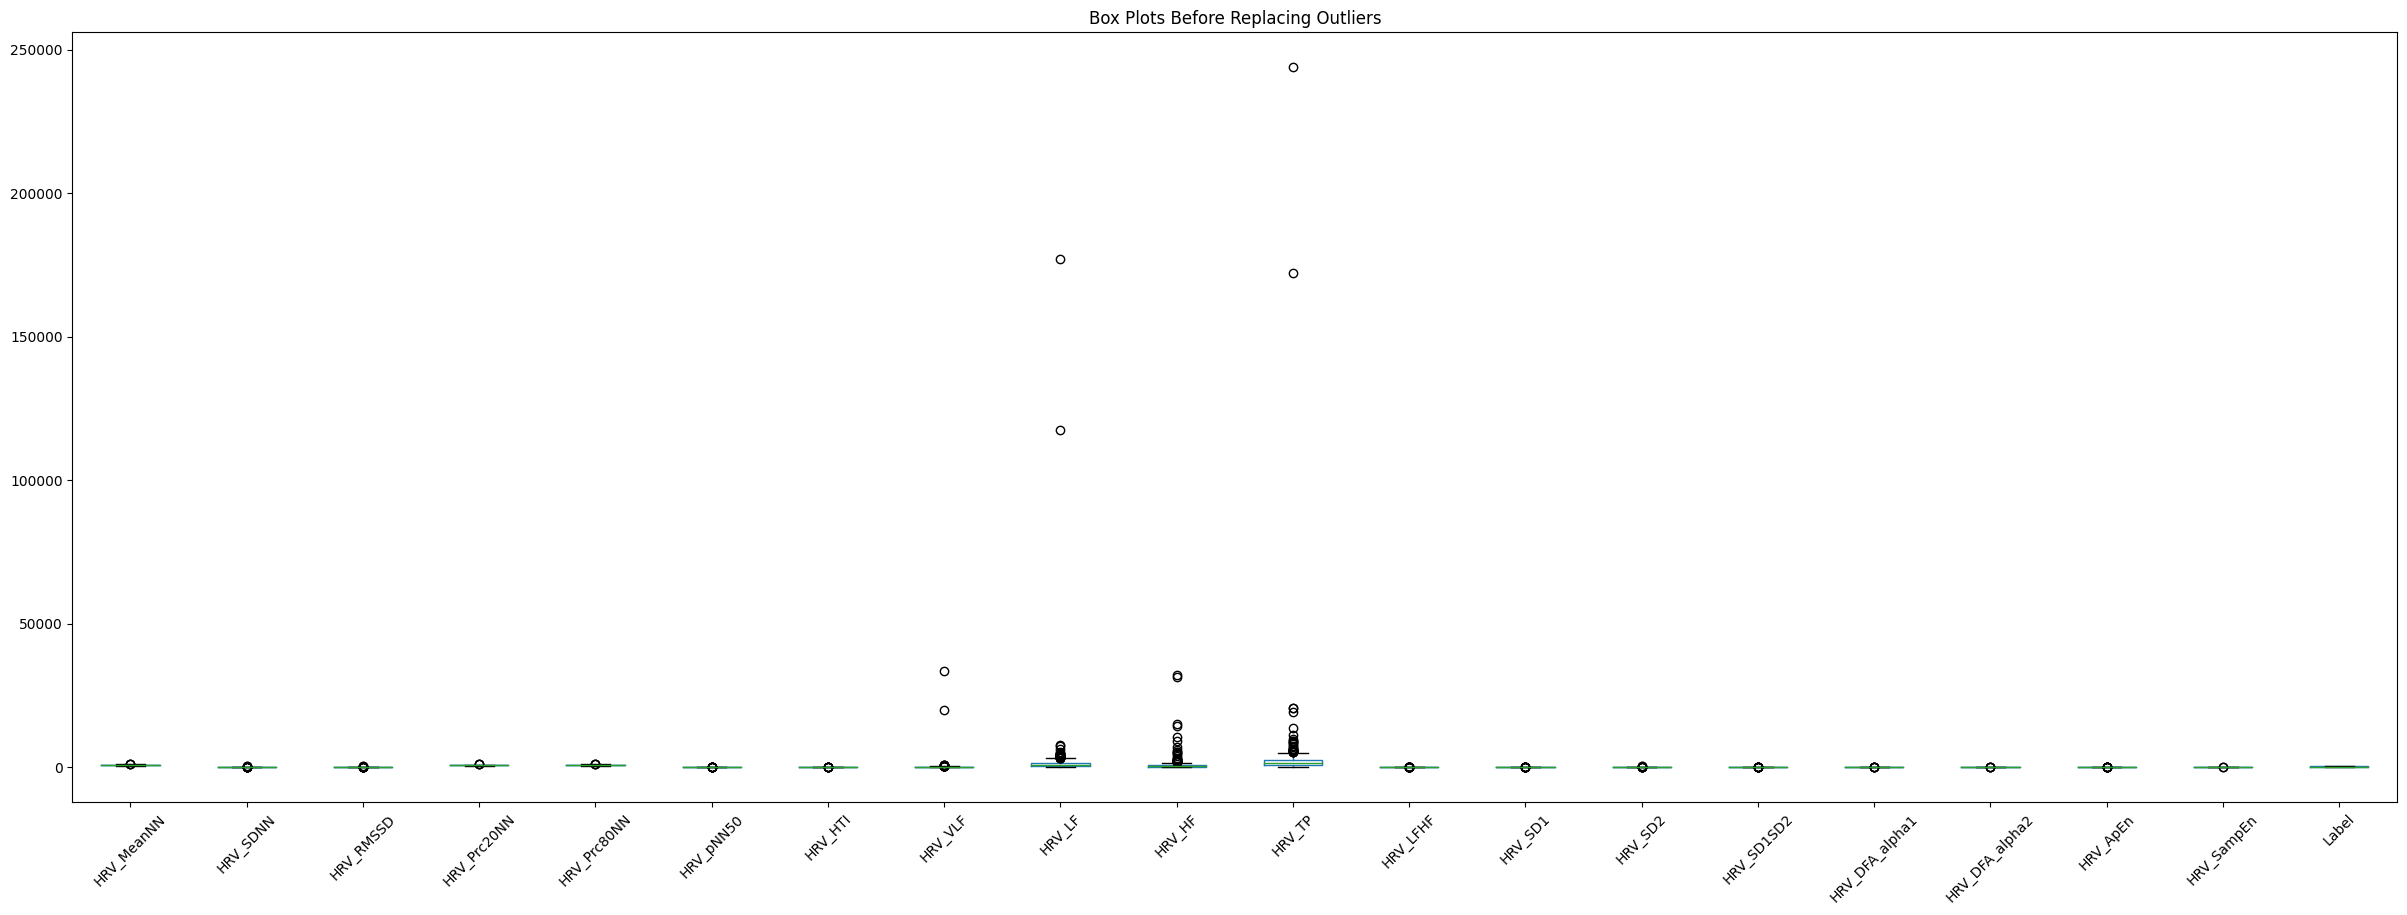

In [6]:
# Visualize outliers using box plots
plt.figure(figsize=(30, 10))
data.boxplot()
plt.title(f'Box Plots Before Replacing Outliers')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

##### MAKING THE FUNCTION TO DETECT THE OUTLIER USING INTER QUARTILE RANGE METHOD

In [7]:
# making a list of interested features excludnig lable 
intrested_features = data.columns

def iqr_outliers(dataset,feature_name, multiplier=4):
    
    Q1 = dataset[feature_name].quantile(0.25)
    Q3 = dataset[feature_name].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lwr_bound = Q1 - multiplier * IQR
    upp_bound = Q3 + multiplier * IQR 
    
    ls = dataset.index[np.logical_or(dataset[feature_name]<lwr_bound, 
                                dataset[feature_name]>upp_bound)] 
    return ls #return the indexes

outliers_detected={}
for i in intrested_features:
    outliers = iqr_outliers(data,i)
    outliers_detected[i] = outliers
    
    print('Variable',i)
    print(outliers)
    print(data[i].iloc[outliers])
    print('\n')

Variable HRV_MeanNN
Index([], dtype='int64')
Series([], Name: HRV_MeanNN, dtype: float64)


Variable HRV_SDNN
Index([130, 131], dtype='int64')
130    389.188189
131    379.291425
Name: HRV_SDNN, dtype: float64


Variable HRV_RMSSD
Index([72, 75, 76, 77, 130, 131], dtype='int64')
72     170.019078
75     177.096725
76     168.871906
77     143.089436
130    382.526115
131    358.175022
Name: HRV_RMSSD, dtype: float64


Variable HRV_Prc20NN
Index([], dtype='int64')
Series([], Name: HRV_Prc20NN, dtype: float64)


Variable HRV_Prc80NN
Index([], dtype='int64')
Series([], Name: HRV_Prc80NN, dtype: float64)


Variable HRV_pNN50
Index([], dtype='int64')
Series([], Name: HRV_pNN50, dtype: float64)


Variable HRV_HTI
Index([], dtype='int64')
Series([], Name: HRV_HTI, dtype: float64)


Variable HRV_VLF
Index([66, 76, 130, 131, 146, 185, 193, 233, 335, 424], dtype='int64')
66       572.612370
76       611.385388
130    20027.427774
131    33458.813731
146      597.237346
185      588.741756
193   

##### REPLACING THE OUTLIERS WITH MEDIAN BY THAT OUTLIERS WILL NOT AFFECT OUR RESULT / ACCURACY

In [8]:
for i in intrested_features:
    data[i] = data[i].replace(data[i].iloc[outliers_detected[i]].values,data[i].median())

##### AGAIN PLOTING BOX-PLOT TO SEE DATA AFTER HANDLING OUTLIERS

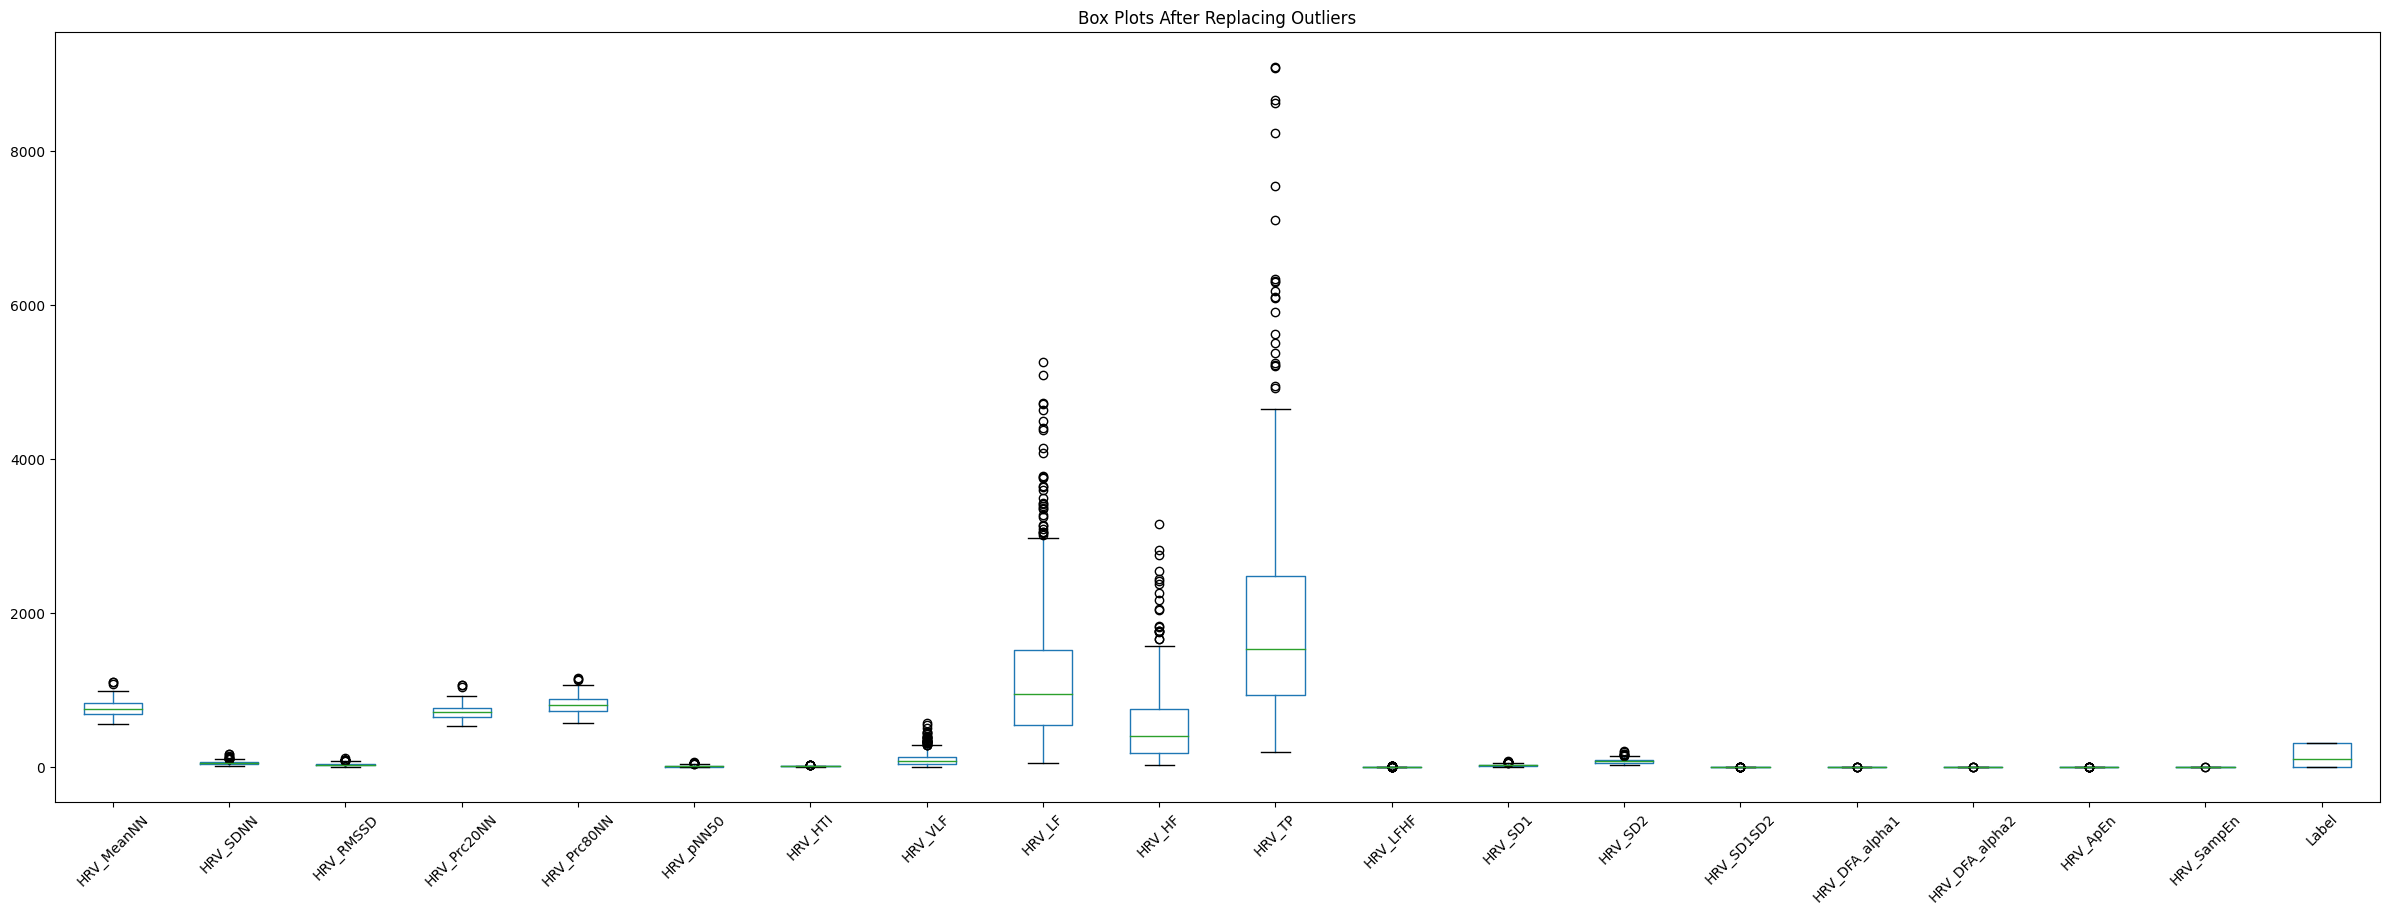

In [9]:
plt.figure(figsize=(30,10))
plt.title(f'Box Plots After Replacing Outliers')
data.boxplot(grid=False)
plt.xticks(rotation=45)
plt.show()

## DATA VISUALIZATION AND DISTRIBUTION ANALYSIS

#### HISTOGRAM FOR NUMERICAL FEATURES

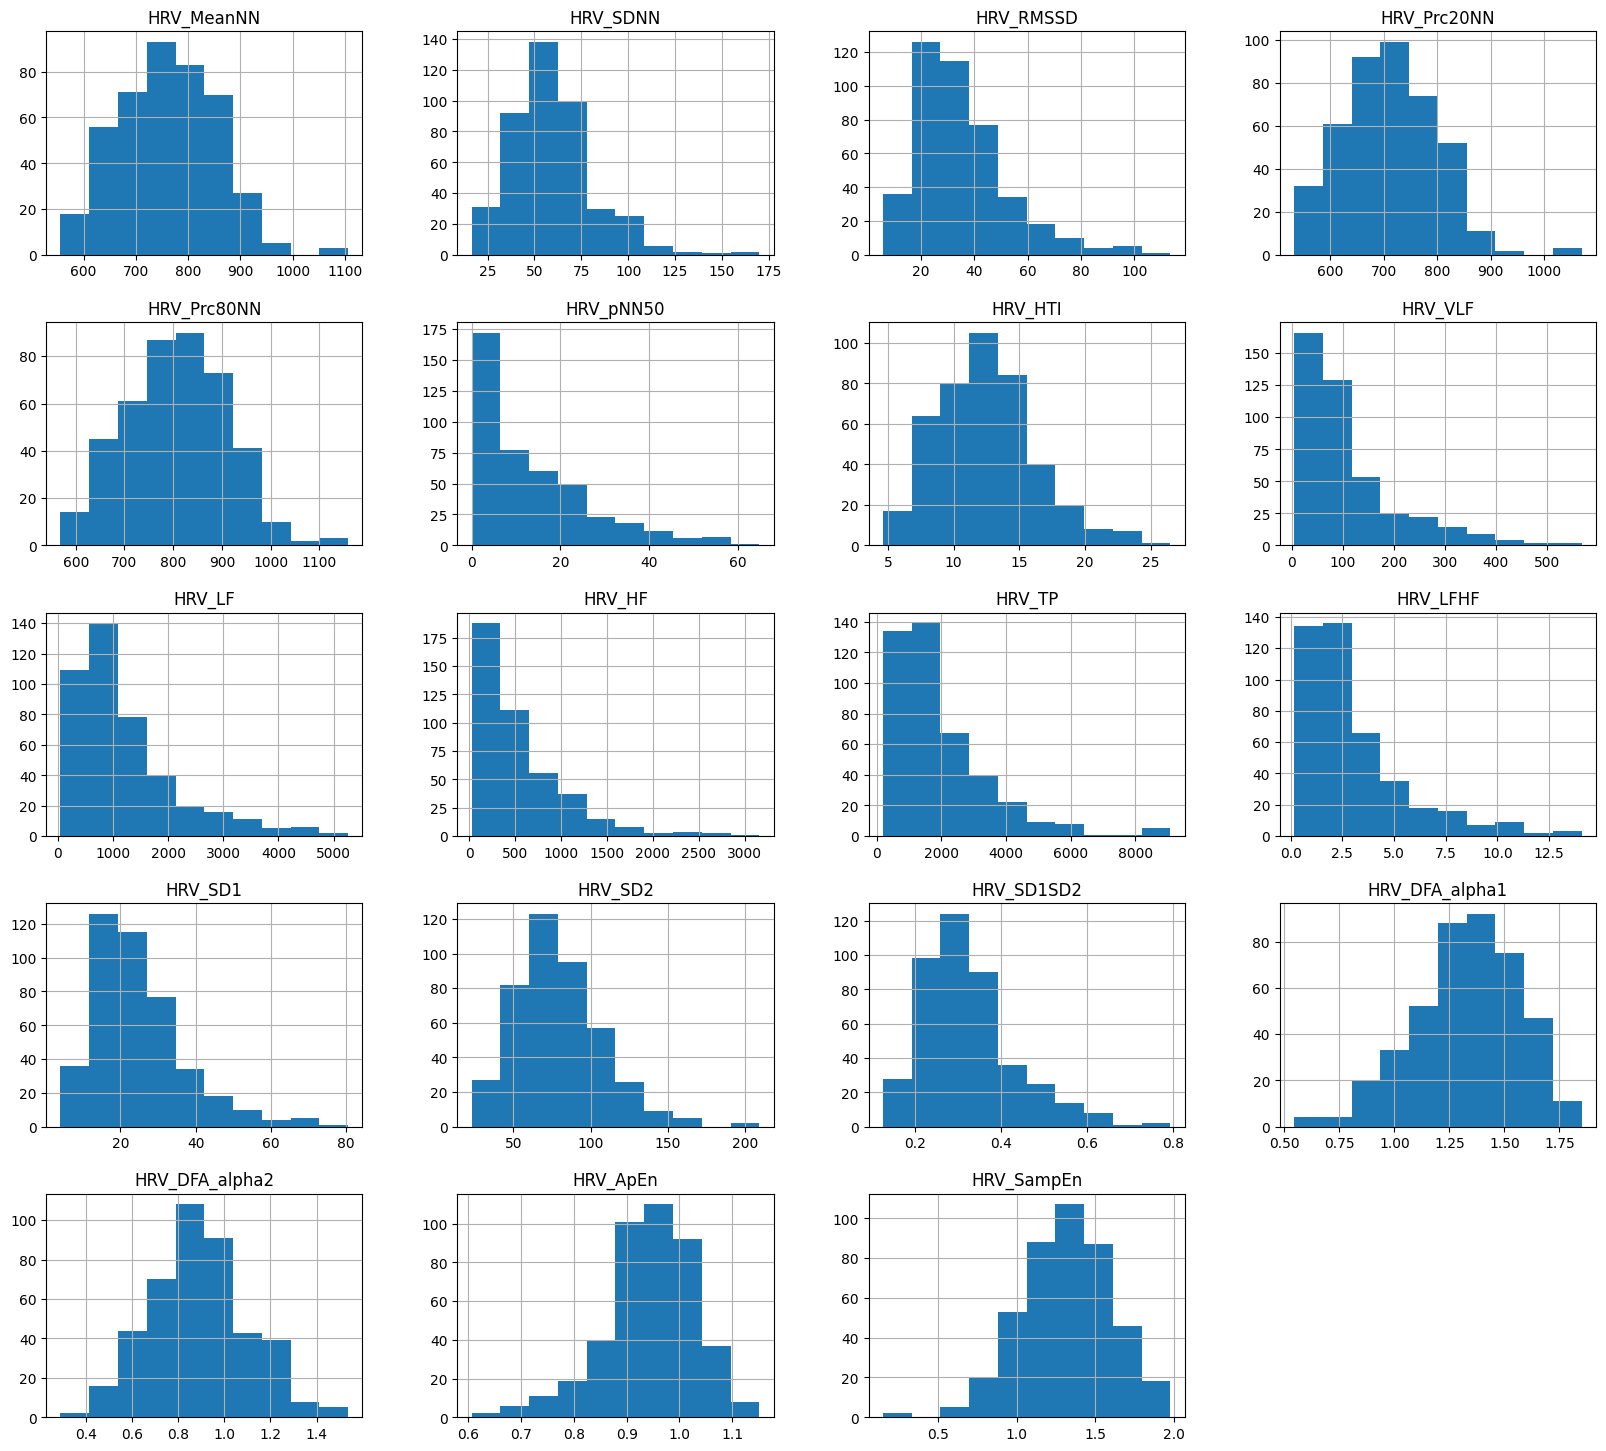

In [174]:
# Visualize the distribution of numerical features
numerical_features = data.select_dtypes(include=['float64']).columns

data[numerical_features].hist(figsize=(20,18))
plt.show()

### CATEGORICAL DISTRIBUTION

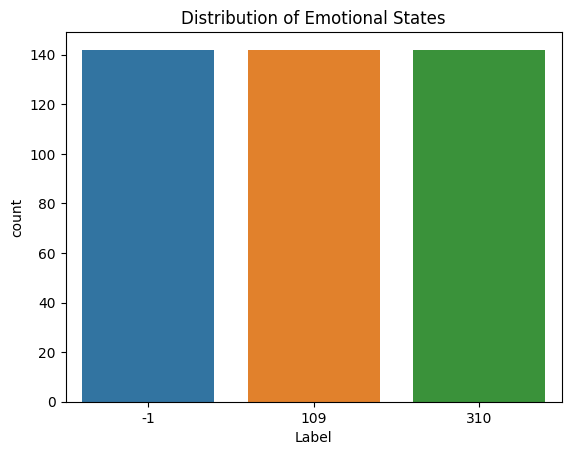

In [175]:
# Visualize the distribution of emotional states
sns.countplot(x='Label', data=data)
plt.title('Distribution of Emotional States')
plt.show()


#### PAIRWISE SCATTER PLOT ( TO SEE THE RELATIONSHIP BETWEEN THE NUMERICAL FEATURES )

In [176]:
# sns.pairplot(data[numerical_features])
# plt.show()

### CORRELATION MATRIX

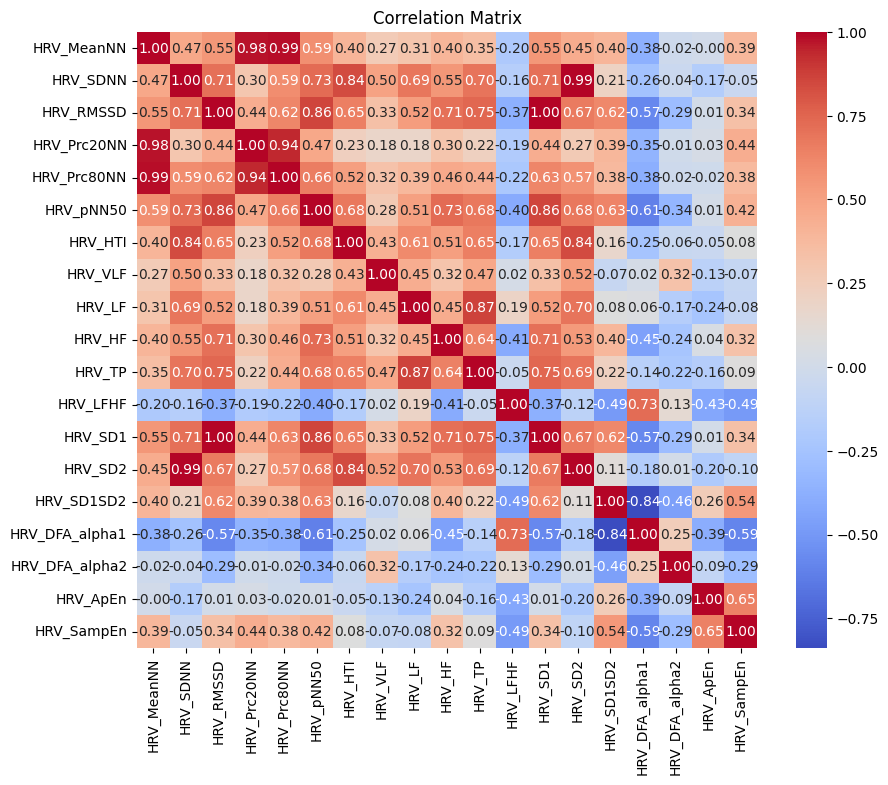

In [177]:
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### CORRELATION MATRIX FOR HIGHLY CORRELATED FEATURES

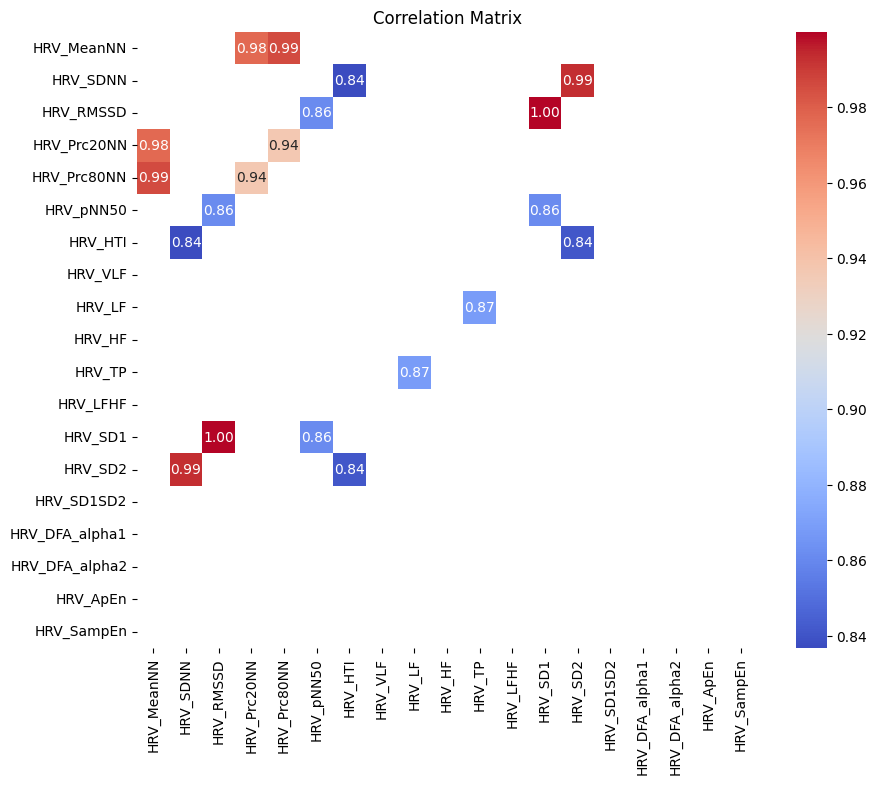

In [178]:
np.fill_diagonal(correlation_matrix.values,val=0)
positive = correlation_matrix[correlation_matrix > 0]

threshold = 0.8
correlation_hc_matrix = positive[positive>threshold]

# Visualize Correlation Matrix for highly correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_hc_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [179]:
data.head()

,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_Prc20NN,HRV_Prc80NN,HRV_pNN50,HRV_HTI,HRV_VLF,HRV_LF,HRV_HF,HRV_TP,HRV_LFHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_DFA_alpha1,HRV_DFA_alpha2,HRV_ApEn,HRV_SampEn,Label
0,838.708920,77.858966,42.966689,773.2,907.4,21.962617,15.285714,135.219052,1984.443232,941.576892,3083.350848,2.107574,30.452465,105.943750,0.287440,1.482091,0.754264,0.863522,1.311373,-1
1,899.929293,80.454862,50.910712,838.6,960.4,24.623116,15.307692,77.009053,1012.790954,712.205460,1835.167749,1.422049,36.089337,108.046467,0.334017,1.443776,0.683996,0.920773,1.357924,310
2,827.319444,64.428505,40.450375,766.4,881.8,20.276498,15.500000,129.751167,1924.529470,761.893623,2848.723565,2.525982,28.668833,86.661784,0.330813,1.335662,0.940213,0.974523,1.587459,109
3,768.630901,76.803474,43.512943,699.0,837.4,23.076923,16.714286,163.822696,4643.049228,806.486463,5625.889299,5.757132,30.832839,104.157364,0.296022,1.542718,0.598340,0.831501,1.081248,-1
4,807.432432,82.942629,49.326201,731.0,879.2,18.834081,13.937500,132.967712,2348.301339,567.338064,3066.742236,4.139157,34.955488,111.937167,0.312278,1.467014,0.611829,0.821712,1.107051,310


In [180]:
# Remove one of the features from each highly correlated pair
features_to_remove = set()

high_corr_pairs = [(0,3),(0,4),(1,6),(1,13),(2,5),(2,12),(3,4),(5,12),(6,13),(8,10)]
    
for feature1, feature2 in high_corr_pairs:
    columns = data.columns
    colname1 = data.columns[feature1]
    colname2 = data.columns[feature2]
    
    if ( colname1+'_'+colname2 not in columns ) and ( colname2+'_'+colname1 not in columns ):
        data[f"{colname1}_{colname2}"] = data[[colname1, colname2]].mean(axis=1)
    if feature1 not in features_to_remove:
        features_to_remove.add(feature1)
    if feature2 not in features_to_remove:
        features_to_remove.add(feature2)

print(features_to_remove)
print(high_corr_pairs)

# Drop the identified features
data_filtered = data.drop(columns=data.columns[list(features_to_remove)])

data = data_filtered

data_filtered.head()

{0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 13}
[(0, 3), (0, 4), (1, 6), (1, 13), (2, 5), (2, 12), (3, 4), (5, 12), (6, 13), (8, 10)]


,HRV_VLF,HRV_HF,HRV_LFHF,HRV_SD1SD2,HRV_DFA_alpha1,HRV_DFA_alpha2,HRV_ApEn,HRV_SampEn,Label,HRV_MeanNN_HRV_Prc20NN,HRV_MeanNN_HRV_Prc80NN,HRV_SDNN_HRV_HTI,HRV_SDNN_HRV_SD2,HRV_RMSSD_HRV_pNN50,HRV_RMSSD_HRV_SD1,HRV_Prc20NN_HRV_Prc80NN,HRV_pNN50_HRV_SD1,HRV_HTI_HRV_SD2,HRV_LF_HRV_TP
0,135.219052,941.576892,2.107574,0.287440,1.482091,0.754264,0.863522,1.311373,-1,805.954460,873.054460,46.572340,91.901358,32.464653,36.709577,840.3,26.207541,60.614732,2533.897040
1,77.009053,712.205460,1.422049,0.334017,1.443776,0.683996,0.920773,1.357924,310,869.264646,930.164646,47.881277,94.250665,37.766914,43.500025,899.5,30.356226,61.677080,1423.979351
2,129.751167,761.893623,2.525982,0.330813,1.335662,0.940213,0.974523,1.587459,109,796.859722,854.559722,39.964252,75.545144,30.363436,34.559604,824.1,24.472666,51.080892,2386.626518
3,163.822696,806.486463,5.757132,0.296022,1.542718,0.598340,0.831501,1.081248,-1,733.815451,803.015451,46.758880,90.480419,33.294933,37.172891,768.2,26.954881,60.435825,5134.469263
4,132.967712,567.338064,4.139157,0.312278,1.467014,0.611829,0.821712,1.107051,310,769.216216,843.316216,48.440064,97.439898,34.080141,42.140845,805.1,26.894784,62.937334,2707.521788


## FEATURE SELECTION

In [181]:
X = data.drop('Label', axis=1)
y = data['Label']

data.head(200)

,HRV_VLF,HRV_HF,HRV_LFHF,HRV_SD1SD2,HRV_DFA_alpha1,HRV_DFA_alpha2,HRV_ApEn,HRV_SampEn,Label,HRV_MeanNN_HRV_Prc20NN,HRV_MeanNN_HRV_Prc80NN,HRV_SDNN_HRV_HTI,HRV_SDNN_HRV_SD2,HRV_RMSSD_HRV_pNN50,HRV_RMSSD_HRV_SD1,HRV_Prc20NN_HRV_Prc80NN,HRV_pNN50_HRV_SD1,HRV_HTI_HRV_SD2,HRV_LF_HRV_TP
0,135.219052,941.576892,2.107574,0.287440,1.482091,0.754264,0.863522,1.311373,-1,805.954460,873.054460,46.572340,91.901358,32.464653,36.709577,840.3,26.207541,60.614732,2533.897040
1,77.009053,712.205460,1.422049,0.334017,1.443776,0.683996,0.920773,1.357924,310,869.264646,930.164646,47.881277,94.250665,37.766914,43.500025,899.5,30.356226,61.677080,1423.979351
2,129.751167,761.893623,2.525982,0.330813,1.335662,0.940213,0.974523,1.587459,109,796.859722,854.559722,39.964252,75.545144,30.363436,34.559604,824.1,24.472666,51.080892,2386.626518
3,163.822696,806.486463,5.757132,0.296022,1.542718,0.598340,0.831501,1.081248,-1,733.815451,803.015451,46.758880,90.480419,33.294933,37.172891,768.2,26.954881,60.435825,5134.469263
4,132.967712,567.338064,4.139157,0.312278,1.467014,0.611829,0.821712,1.107051,310,769.216216,843.316216,48.440064,97.439898,34.080141,42.140845,805.1,26.894784,62.937334,2707.521788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,9.892150,200.688349,3.272442,0.338814,1.471165,0.580675,1.064098,1.380044,-1,618.381206,644.681206,23.386380,44.687021,14.712936,20.909193,629.3,11.143253,29.876399,767.027246
196,65.761240,53.494312,2.250180,0.199412,1.718953,0.891783,0.768371,0.835745,310,628.385455,669.885455,30.628709,60.948857,11.061077,17.039522,647.5,8.152358,40.542371,1085.101183
197,37.235795,119.984262,2.250180,0.257194,1.691046,0.903740,0.713658,0.772566,109,615.321555,641.521555,27.495069,55.310912,13.024359,19.844129,626.2,9.636672,36.168784,1824.238142
198,21.110207,142.736154,2.285637,0.229814,1.340619,1.243103,0.971185,1.249913,-1,731.279412,765.779412,28.819854,58.086111,12.391592,18.670103,749.5,9.207381,38.118108,411.596539


In [184]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

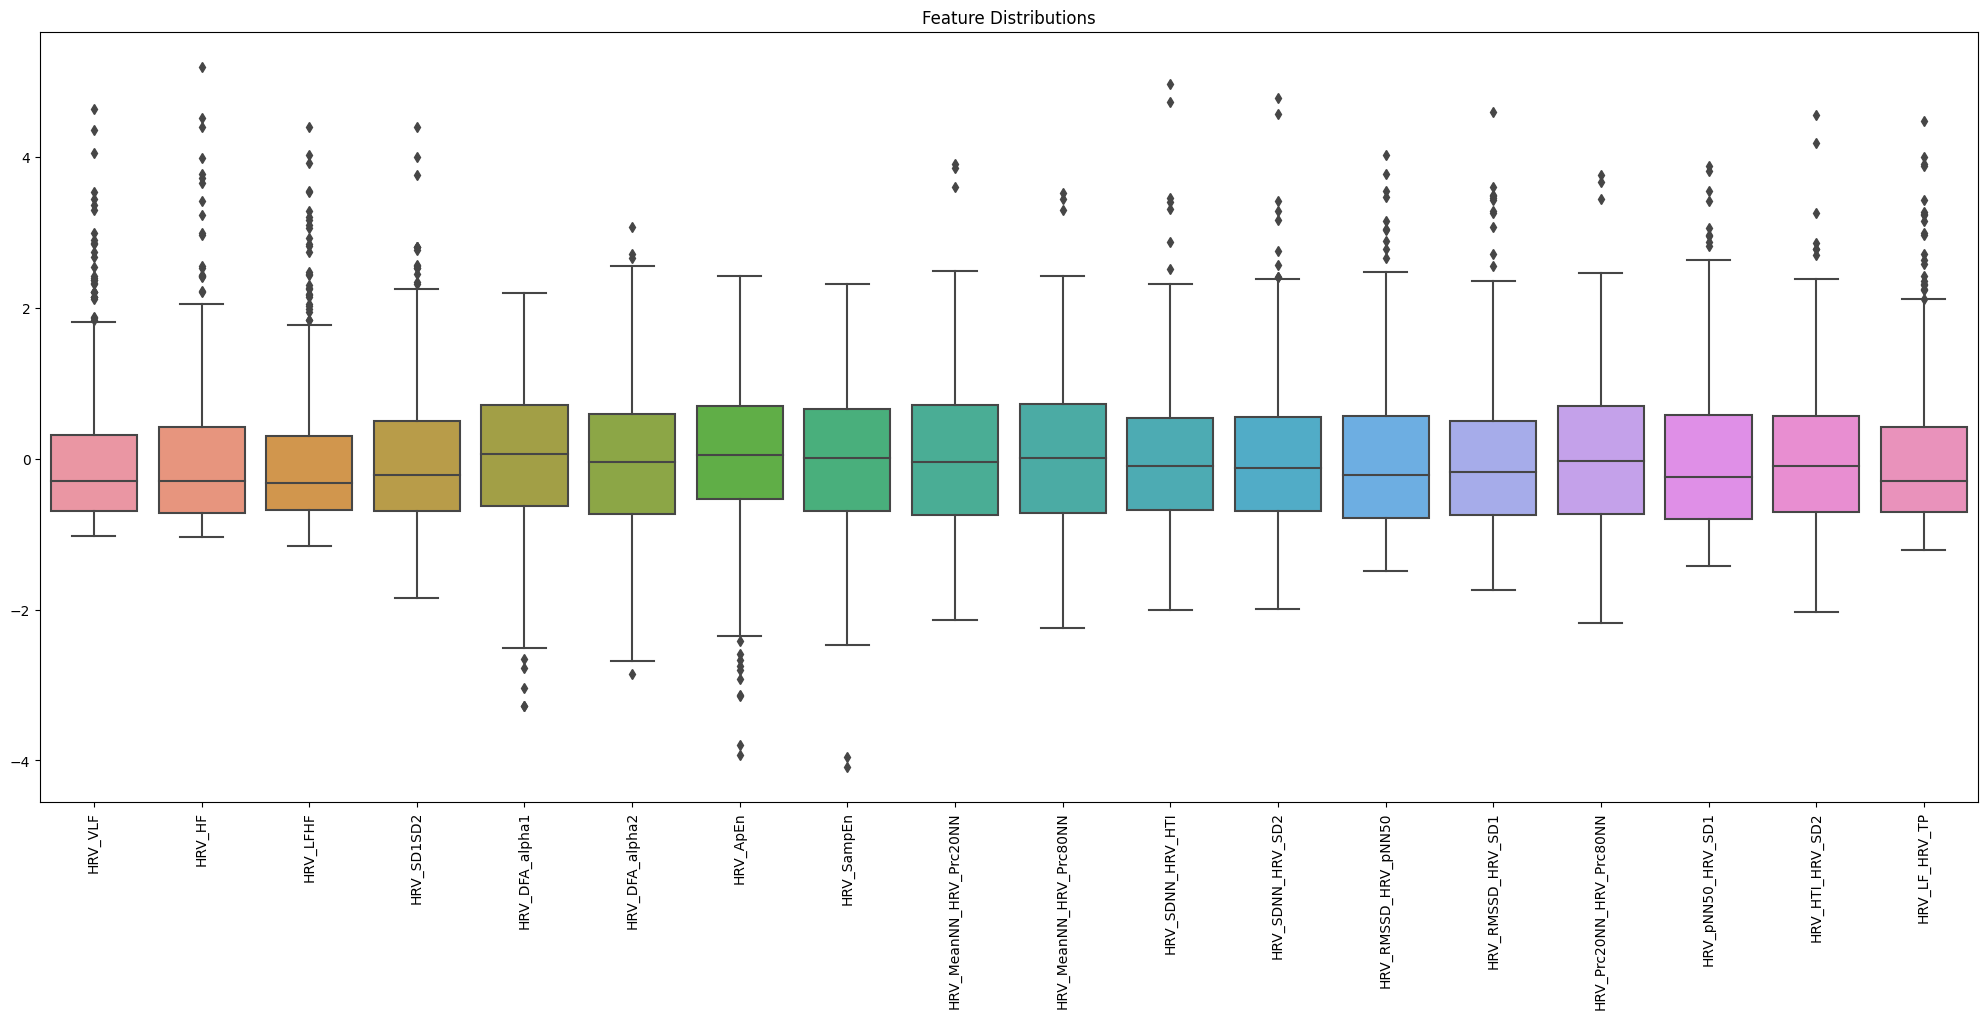

In [185]:
# Feature Visualization
# Visualize feature distributions
plt.figure(figsize=(25, 10))
sns.boxplot(data=X_scaled)
plt.title('Feature Distributions')
plt.xticks(rotation=90)
plt.show()

### APPLYING UNIVARIATE FEATURE SELECTION USING HE ANOVA F-SCORE TEST

In [186]:
# Feature Selection
# Select relevant features using ANOVA F-statistic
selector = SelectKBest(f_classif, k=5)
X_selected_fscore = selector.fit_transform(X_scaled, y)
X_fit = selector.fit(X_scaled, y)

In [187]:
# Display selected features
selected_features = X_scaled.columns[selector.get_support()]
print("\nSelected Features:")
print(selected_features)


Selected Features:
Index(['HRV_HF', 'HRV_LFHF', 'HRV_DFA_alpha1', 'HRV_SampEn', 'HRV_LF_HRV_TP'], dtype='object')


### VISUALIZING THE SCORE OF THE FEATURES

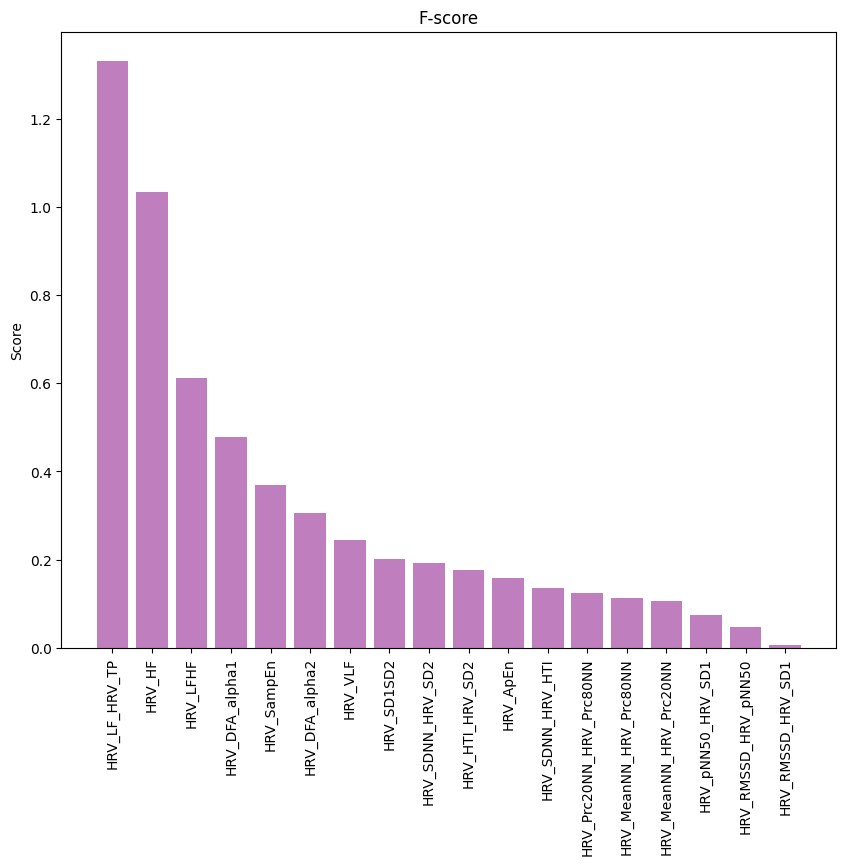

In [188]:
dfcolumns = pd.DataFrame(X_scaled.columns)
dfscores = pd.DataFrame(X_fit.scores_)

# Concatenate two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
featureScores = featureScores.sort_values(by='Score',ascending=False)

plt.figure(figsize=(10,8))
plt.bar(featureScores['Feature'], featureScores['Score'], color='purple',alpha=0.5)
plt.title('F-score')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.show()

In [189]:
X_fscore = pd.DataFrame(X_selected_fscore.astype(float),columns=['HRV_LF_HRV_TP','HRV_HF','HRV_LFHF','HRV_DFA_alpha1','HRV_SampEn'])
X_fscore

,HRV_LF_HRV_TP,HRV_HF,HRV_LFHF,HRV_DFA_alpha1,HRV_SampEn
0,0.787127,-0.376857,0.648227,-0.012254,0.793880
1,0.330489,-0.650622,0.487529,0.151331,-0.134021
2,0.429409,-0.209766,0.034081,0.957958,0.670761
3,0.518185,1.080597,0.902506,-0.820955,2.967983
4,0.042083,0.434457,0.584991,-0.730278,0.939032
...,...,...,...,...,...
421,-0.693108,1.753107,1.666020,-1.757643,0.029240
422,-0.902887,2.453159,1.321114,-0.769243,-0.556319
423,-0.691177,0.748663,0.863070,-0.808897,-0.378578
424,-0.630808,3.174358,1.198308,-2.267956,1.161306


## RECURSIVE FEATURE ELIMINATION ( RFE )

#### USING RFE WITH LOGISTIC REGRESSION MODEL

In [190]:
model = LogisticRegression()

In [191]:
rfe = RFE(model, n_features_to_select=5) # Selecting top 5 features
X_selected_rfe = rfe.fit(X_scaled, y)

#### DISCUSS THE CHOOSEN FEATURES

In [192]:
# Print the selected features
selected_features2 = [f for f, s in zip(X_scaled.columns, X_selected_rfe.support_) if s]
print("Selected Features: ", selected_features2)

Selected Features:  ['HRV_DFA_alpha1', 'HRV_RMSSD_HRV_SD1', 'HRV_pNN50_HRV_SD1', 'HRV_HTI_HRV_SD2', 'HRV_LF_HRV_TP']


In [193]:
X_rfe = X_scaled[selected_features2]
X_rfe

,HRV_DFA_alpha1,HRV_RMSSD_HRV_SD1,HRV_pNN50_HRV_SD1,HRV_HTI_HRV_SD2,HRV_LF_HRV_TP
0,0.648227,0.442477,0.561594,0.925991,0.793880
1,0.487529,0.909954,0.901963,0.993497,-0.134021
2,0.034081,0.294465,0.419261,0.320172,0.670761
3,0.902506,0.474373,0.622908,0.914623,2.967983
4,0.584991,0.816384,0.617978,1.073579,0.939032
...,...,...,...,...,...
421,1.666020,-0.776835,-0.823599,-0.388714,0.029240
422,1.321114,-1.062088,-1.043558,-0.941082,-0.556319
423,0.863070,-0.476883,-0.498742,-0.266378,-0.378578
424,1.198308,-0.210344,-0.358999,0.899528,1.161306


## PCA ( FOR DIMENTIONALITY REDUCTION )

In [194]:
# Principal Component Analysis (PCA)
# Apply PCA for dimensionality reduction
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

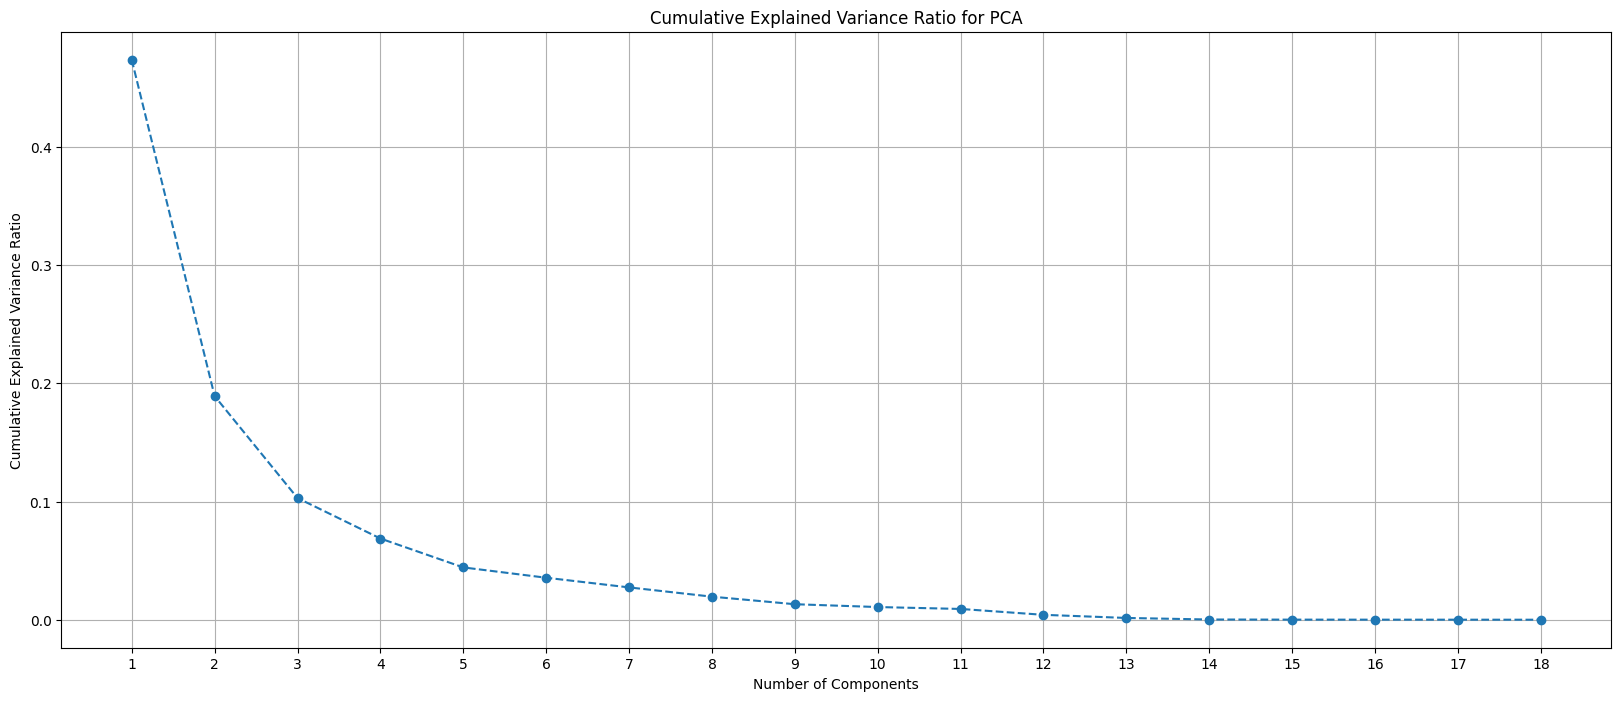

In [195]:
# Calculate the cumulative explained variance ratio
cumulative_explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance ratio
plt.figure(figsize=(20, 8))
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='--')
plt.xticks(range(1, len(cumulative_explained_variance_ratio) + 1))
plt.title('Cumulative Explained Variance Ratio for PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [196]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
labels

{'0': 'PC 1 (47.4%)',
 '1': 'PC 2 (18.9%)',
 '2': 'PC 3 (10.3%)',
 '3': 'PC 4 (6.9%)',
 '4': 'PC 5 (4.4%)',
 '5': 'PC 6 (3.6%)',
 '6': 'PC 7 (2.7%)',
 '7': 'PC 8 (2.0%)',
 '8': 'PC 9 (1.3%)',
 '9': 'PC 10 (1.1%)',
 '10': 'PC 11 (0.9%)',
 '11': 'PC 12 (0.4%)',
 '12': 'PC 13 (0.1%)',
 '13': 'PC 14 (0.0%)',
 '14': 'PC 15 (0.0%)',
 '15': 'PC 16 (0.0%)',
 '16': 'PC 17 (0.0%)',
 '17': 'PC 18 (0.0%)'}

### Plot the first 2 principal components

In [235]:
X_pca = pd.DataFrame(PCA(n_components=2).fit_transform(X_scaled),columns=['PC1','PC2'])

In [236]:
X_pca.shape

(426, 2)

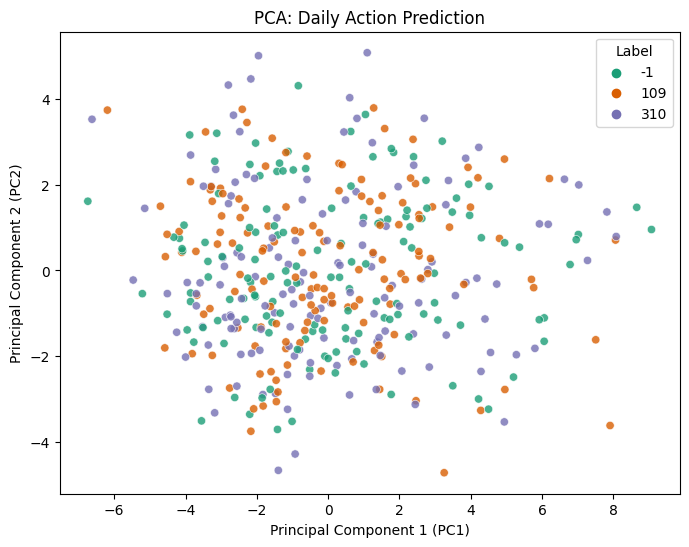

In [237]:
# Plot the data points in the reduced-dimensional space
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue=y, data=X_pca, palette='Dark2', alpha=0.8)
plt.title('PCA: Daily Action Prediction')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Label', loc='upper right')
plt.show()

In [223]:
def evaluate_model(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # GridSearchCV for hyperparameter tuning
    param_grid = { 'n_estimators': [50, 100, 200], 
                  'max_depth': [None, 10, 20, 30], 
                  'min_samples_split': [2, 5, 10], 
                  'min_samples_leaf': [1, 2, 4] }
    
    model = RandomForestClassifier()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Best parameters
    best_parameters = grid_search.best_params_
    print("Best Parameters:", best_parameters)

    # Training the model with the best parameters
    best_model = grid_search.best_estimator_

    # Predictions
    predictions = best_model.predict(X_test)
    
    print("Classification Report:")
    print(classification_report(y_test, predictions))

    # Evaluation
    conf_matrix = confusion_matrix(y_test, predictions)

    # Visualization of Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Classification Report:
              precision    recall  f1-score   support

          -1       0.28      0.17      0.21        48
         109       0.24      0.43      0.31        35
         310       0.33      0.27      0.30        45

    accuracy                           0.27       128
   macro avg       0.28      0.29      0.27       128
weighted avg       0.29      0.27      0.27       128



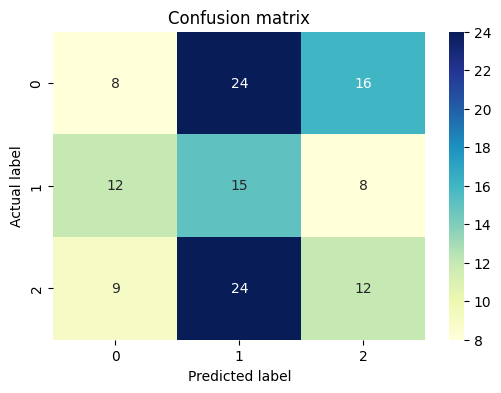

In [224]:
evaluate_model(X_scaled, y)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Classification Report:
              precision    recall  f1-score   support

          -1       0.32      0.21      0.25        48
         109       0.33      0.49      0.40        35
         310       0.35      0.36      0.35        45

    accuracy                           0.34       128
   macro avg       0.33      0.35      0.33       128
weighted avg       0.33      0.34      0.33       128



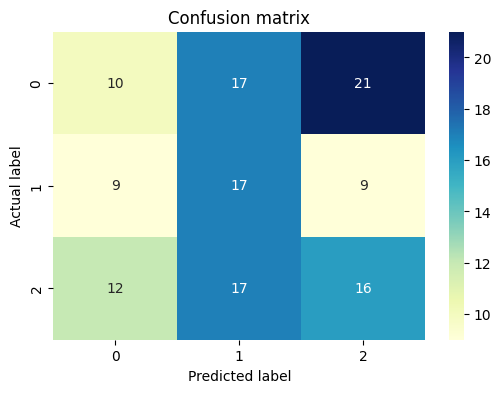

In [227]:
evaluate_model(X_fscore, y)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

          -1       0.30      0.23      0.26        48
         109       0.28      0.34      0.31        35
         310       0.38      0.40      0.39        45

    accuracy                           0.32       128
   macro avg       0.32      0.32      0.32       128
weighted avg       0.32      0.32      0.32       128



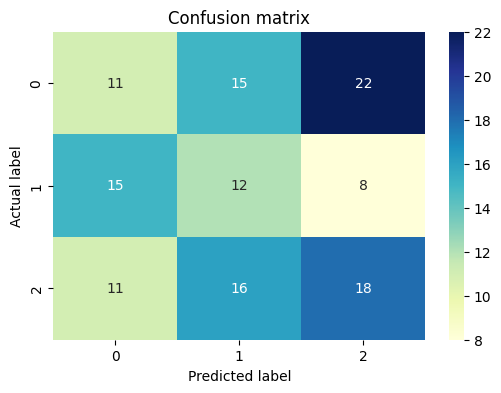

In [225]:
evaluate_model(X_rfe, y)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Classification Report:
              precision    recall  f1-score   support

          -1       0.37      0.33      0.35        48
         109       0.21      0.29      0.24        35
         310       0.34      0.29      0.31        45

    accuracy                           0.30       128
   macro avg       0.31      0.30      0.30       128
weighted avg       0.32      0.30      0.31       128



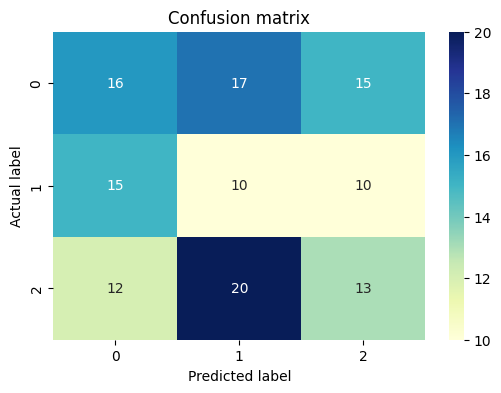

In [234]:
evaluate_model(X_pca, y)